<a href="https://www.kaggle.com/code/rkmaurya93/sigmoid?scriptVersionId=258134643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/ushape-dataset/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


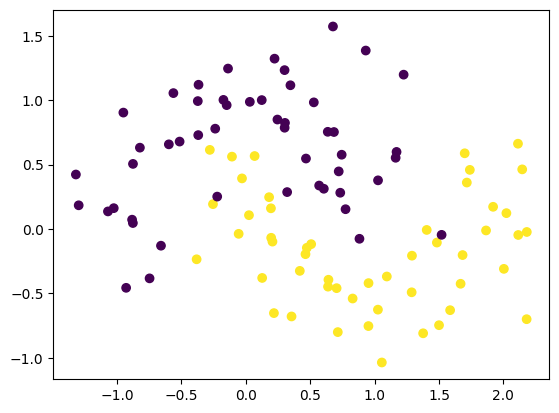

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [6]:
import tensorflow as tf
from tensorflow import  keras
from keras import  Sequential
from keras.layers import Dense

2025-08-25 17:04:49.380899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756141489.667413      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756141489.758941      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
model=Sequential()

In [8]:
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-25 17:05:07.941717: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.5128457 , -0.57226163, -0.5801586 , -0.5949085 , -0.25229862,
          0.44777638, -0.19389707, -0.560724  ,  0.43151313,  0.32967085],
        [ 0.17332083,  0.6762981 , -0.45605755, -0.69119465,  0.02507013,
          0.48461682, -0.55188936, -0.6215969 , -0.291465  , -0.32488763]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6710937 ],
        [ 0.48348826],
        [-0.6781814 ],
        [ 0.41181213],
        [ 0.47693056],
        [-0.20337892],
        [ 0.04881501],
        [ 0.6733046 ],
        [-0.3382309 ],
        [ 0.4898545 ]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights=model.get_weights()

In [11]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.5312 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5195 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4844 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [16]:
model.get_weights()

[array([[-0.4741798 , -0.4741798 , -0.4741798 , -0.4741798 , -0.4741798 ,
         -0.4741798 , -0.4741798 , -0.4741798 , -0.4741798 , -0.4741798 ],
        [ 0.49822342,  0.49822342,  0.49822342,  0.49822342,  0.49822342,
          0.49822342,  0.49822342,  0.49822342,  0.49822342,  0.49822342]],
       dtype=float32),
 array([-0.10899796, -0.10899796, -0.10899796, -0.10899796, -0.10899796,
        -0.10899796, -0.10899796, -0.10899796, -0.10899796, -0.10899796],
       dtype=float32),
 array([[-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171],
        [-0.06409171]], dtype=float32),
 array([0.0709329], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

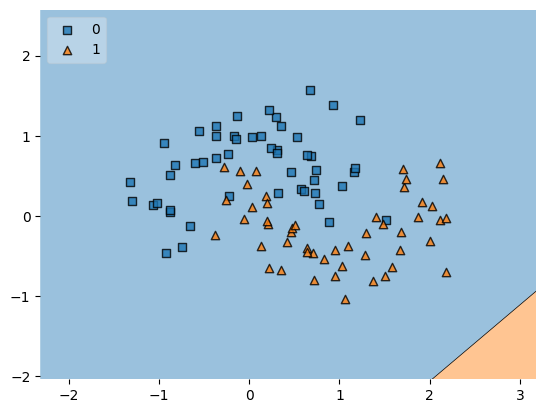

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)

# Initialization with constant values:
-> we can't initialize our value to 0 and also with non zero constant
 -> else we initialize the value to random....

In [18]:
model=Sequential()  

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.get_weights()

[array([[-0.32481346, -0.10215908,  0.33565527,  0.14166838,  0.21020049,
          0.5850628 , -0.6090759 ,  0.608807  , -0.02643436,  0.0473063 ],
        [-0.37554273,  0.55076104,  0.03538984,  0.33989328,  0.5853742 ,
         -0.6677237 ,  0.1016838 , -0.01189148,  0.39532477, -0.14012259]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.28853828],
        [-0.6547811 ],
        [ 0.56056887],
        [-0.07457024],
        [-0.03862977],
        [-0.19782186],
        [-0.5997225 ],
        [ 0.5540127 ],
        [ 0.568726  ],
        [ 0.70661134]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
initial_weights=model.get_weights()

In [21]:
initial_weights[0]=np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model.get_weights()[3].shape)*0.5

In [22]:
model.set_weights(initial_weights)

In [23]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.4961 - loss: 2.0161 - val_accuracy: 0.5000 - val_loss: 1.8417
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4766 - loss: 2.0809 - val_accuracy: 0.5000 - val_loss: 1.8293
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5117 - loss: 1.9325 - val_accuracy: 0.5000 - val_loss: 1.8172
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4883 - loss: 2.0216 - val_accuracy: 0.5000 - val_loss: 1.8050
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5312 - loss: 1.8183 - val_accuracy: 0.5000 - val_loss: 1.7929
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5312 - loss: 1.8315 - val_accuracy: 0.5000 - val_loss: 1.7807
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5039 - loss: 1.9494 - val_accuracy: 0.5000 - val_loss: 1.7685
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5273 - loss: 1.8203 - val_accuracy: 0.5000 - val_loss

In [26]:
model.get_weights()

[array([[0.44023955, 0.44023955, 0.44023955, 0.44023955, 0.44023955,
         0.44023955, 0.44023955, 0.44023955, 0.44023955, 0.44023955],
        [0.24459831, 0.24459831, 0.24459831, 0.24459831, 0.24459831,
         0.24459831, 0.24459831, 0.24459831, 0.24459831, 0.24459831]],
       dtype=float32),
 array([0.25521743, 0.25521743, 0.25521743, 0.25521743, 0.25521743,
        0.25521743, 0.25521743, 0.25521743, 0.25521743, 0.25521743],
       dtype=float32),
 array([[0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934],
        [0.2294934]], dtype=float32),
 array([0.22104433], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

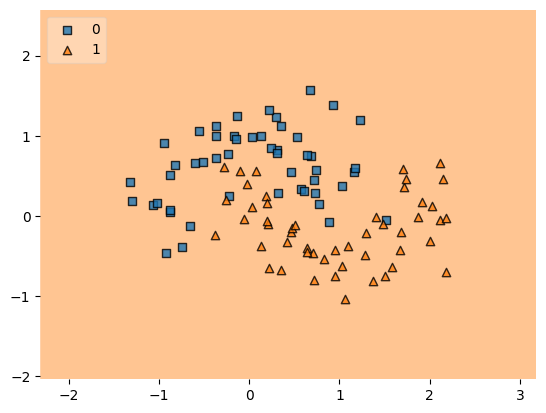

In [27]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)